# VES Experiments for 2D Bayesian Optimization

In [1]:
from ves import *
import matplotlib.pyplot as plt
import numpy as np
import torch

In [2]:
# Global parameters
BOUNDS = torch.zeros(2,2)
BOUNDS[:, 1] = torch.ones(2)
NUM_INIT = 2
NUM_TRIALS = 10
NUM_ITER = 28
NUM_PATHS = 64
# 2D discretization parameters
nx = 101
ny = 101

## Case 1: Dixon-Price Function
Source: https://www.sfu.ca/~ssurjano/dixonpr.html

$$f(x_1, x_2) = -(x_2 - x_1^2)^2 - (1 - x_1)^2$$

Maximizer is  tensor([0.5500, 0.6000]) with value  -0.0


/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666647174771/work/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


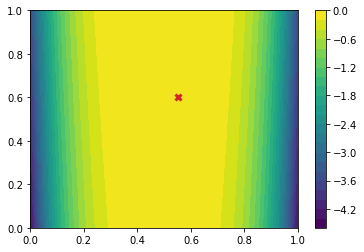

In [3]:
# Define and visualize the function
def f_dp(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 20 * x - 10
    y = 20 * y - 10
    return (-1 * (y - 2 * x**2)**2 - (1 - x)**2) * 1e-4


# plot function f_sn
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_dp(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_dp((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [4]:
ves_dp, ei_dp, mes_dp = run_2d_experiment(f_dp,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_dp, ei_dp, mes_dp = np.log(max_Y - ves_dp), np.log(max_Y - ei_dp), np.log(max_Y - mes_dp)
ves_dp_mean, ei_dp_mean, mes_dp_mean = ves_dp.mean(axis=0), ei_dp.mean(axis=0), mes_dp.mean(axis=0)
ves_dp_std, ei_dp_std, mes_dp_std = ves_dp.std(axis=0), ei_dp.std(axis=0), mes_dp.std(axis=0)

100%|██████████| 10/10 [27:32<00:00, 165.24s/it]


## Case 2: Branin-Hoo function
Reference: https://www.sfu.ca/~ssurjano/branin.html
$$f(x_1, x_2)=\frac{1}{51.95}\left[\left(15x_2 - \frac{5.1(15x_1-5)^2}{4\pi^2}+\frac{5(15x_1-5)}{\pi}-6\right)^2+\left(10-\frac{10}{8\pi}\right)\cos(15x_1-5)-44.81\right]$$

Maximizer is  tensor([0.5400, 0.1500]) with value  1.0471277236938477


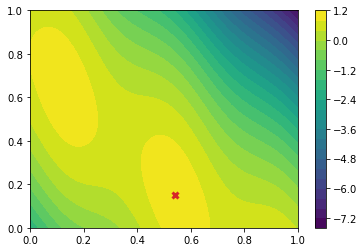

In [5]:
# Define and visualize the function
def f_bh(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    return -((15*y-5.1*(15*x-5)/(4*torch.pi)+5*(15*x-5)/torch.pi-6)**2
            +(10-10/(8*torch.pi))*torch.cos(15*x-5)-44.81)/51.95

# plot function f_bh
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_bh(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_bh((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [6]:
ves_bh, ei_bh, mes_bh = run_2d_experiment(f_bh,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_bh, ei_bh, mes_bh = np.log(max_Y - ves_bh), np.log(max_Y - ei_bh), np.log(max_Y - mes_bh)
ves_bh_mean, ei_bh_mean, mes_bh_mean = ves_bh.mean(axis=0), ei_bh.mean(axis=0), mes_bh.mean(axis=0)
ves_bh_std, ei_bh_std, mes_bh_std = ves_bh.std(axis=0), ei_bh.std(axis=0), mes_bh.std(axis=0)

100%|██████████| 10/10 [57:43<00:00, 346.39s/it]
<ipython-input-6-72dc92e15eaf>:9: RuntimeWarning: divide by zero encountered in log
  ves_bh, ei_bh, mes_bh = np.log(max_Y - ves_bh), np.log(max_Y - ei_bh), np.log(max_Y - mes_bh)
<ipython-input-6-72dc92e15eaf>:9: RuntimeWarning: invalid value encountered in log
  ves_bh, ei_bh, mes_bh = np.log(max_Y - ves_bh), np.log(max_Y - ei_bh), np.log(max_Y - mes_bh)


## Case 3: Goldstein-Price function
Reference: https://www.sfu.ca/~ssurjano/goldpr.html
$$f(x_1, x_2) = \frac{1}{2.427}\left[\log\left([1+(x+y+1)^2(19-14x+3x^2-14y+6xy+3y^2)][30+(2x-3y)^2(18-32x+12x^2+48y-36xy+27y^2)]\right)-8.693\right],$$
where $x=4x_1-2$, $y=4x_2-2$.

Maximizer is  tensor([0.5000, 0.2500]) with value  3.1291253566741943


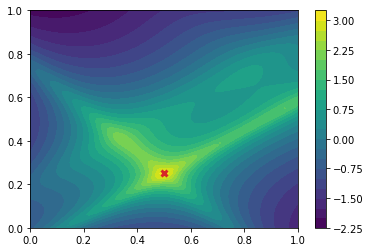

In [7]:
# Define and visualize the function
def f_gp(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 4*x-2
    y = 4*y-2
    return -(torch.log((1+(x+y+1)**2
                       *(19-14*x+3*x**2-14*y+6*x*y+3*y**2))
                       *(30+(2*x-3*y)**2*(18-32*x+12*x**2+48*y-36*x*y+27*y**2)))
                       -8.693)/2.427

# plot function f_gp
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_gp(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_gp((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [8]:
ves_gp, ei_gp, mes_gp = run_2d_experiment(f_gp,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_gp, ei_gp, mes_gp = np.log(max_Y - ves_gp), np.log(max_Y - ei_gp), np.log(max_Y - mes_gp)
ves_gp_mean, ei_gp_mean, mes_gp_mean = ves_gp.mean(axis=0), ei_gp.mean(axis=0), mes_gp.mean(axis=0)
ves_gp_std, ei_gp_std, mes_gp_std = ves_gp.std(axis=0), ei_gp.std(axis=0), mes_gp.std(axis=0)

100%|██████████| 10/10 [1:01:37<00:00, 369.72s/it]


## Case 4: Rosenbrock function
Reference: https://en.wikipedia.org/wiki/Rosenbrock_function
$$f(x_1,x_2) = -(1-x_1)^2-100(x_2-x_1^2)^2$$

Maximizer is  tensor([0.7500, 0.5000]) with value  -0.0


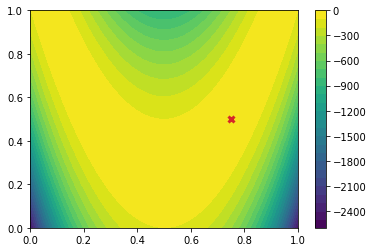

In [9]:
# Define and visualize the function
def f_rs(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 4 * x - 2
    y = 4 * y - 1
    return -(1-x)**2-100*(y-x**2)**2

# plot function f_rs
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_rs(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_rs((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())


In [10]:
ves_rs, ei_rs, mes_rs = run_2d_experiment(f_rs,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_rs, ei_rs, mes_rs = np.log(max_Y - ves_rs), np.log(max_Y - ei_rs), np.log(max_Y - mes_rs)
ves_rs_mean, ei_rs_mean, mes_rs_mean = ves_rs.mean(axis=0), ei_rs.mean(axis=0), mes_rs.mean(axis=0)
ves_rs_std, ei_rs_std, mes_rs_std = ves_rs.std(axis=0), ei_rs.std(axis=0), mes_rs.std(axis=0)

 60%|██████    | 6/10 [15:06<09:58, 149.67s/it]/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-07 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/li

## Case 5: Six-Hump Function
Source: https://www.sfu.ca/~ssurjano/camel6.html
$$f(x_1, x_2) = -\left(4-2.1x_1^2+\frac{x_1^4}{3}\right)x_1^2-x_1x_2-(-4+4x_2^2)x_2^2,$$
where $x_1\in[-3,3], x_2\in[-2,2]$ get re-scaled.

Maximizer is  tensor([0.5200, 0.3200]) with value  1.027880311012268


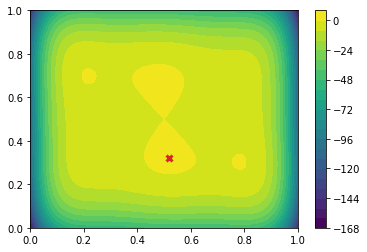

In [11]:
# Define and visualize the function
def f_sh(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 6 * x - 3
    y = 4 * y - 2
    return -(4-2.1*x**2+x**4/3)*x**2-x*y-(-4+4*y**2)*y**2

# plot function f_rs
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_sh(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_sh((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [12]:
ves_sh, ei_sh, mes_sh = run_2d_experiment(f_sh,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_sh, ei_sh, mes_sh = np.log(max_Y - ves_sh), np.log(max_Y - ei_sh), np.log(max_Y - mes_sh)
ves_sh_mean, ei_sh_mean, mes_sh_mean = ves_sh.mean(axis=0), ei_sh.mean(axis=0), mes_sh.mean(axis=0)
ves_sh_std, ei_sh_std, mes_sh_std = ves_sh.std(axis=0), ei_sh.std(axis=0), mes_sh.std(axis=0)

 30%|███       | 3/10 [07:38<16:44, 143.50s/it]/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-07 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(
100%|██████████| 10/10 [26:13<00:

## Case 6: Three-Hump Camel Function
Source: https://www.sfu.ca/~ssurjano/camel3.html
$$f(x_1, x_2) = -2x_1^2+1.05x_1^4-\frac{x_1^6}{6}-x_1x_2-x_2^2,$$
where $x_1\in[-5,5], x_2\in[-5,5]$ get re-scaled.

Maximizer is  tensor([0.5000, 0.5000]) with value  0.0


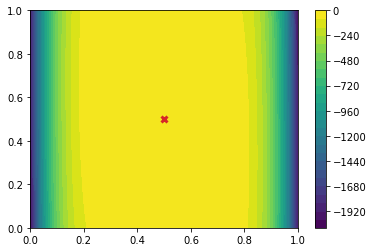

In [13]:
# Define and visualize the function
def f_thc(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 10 * x - 5
    y = 10 * y - 5
    return -2*x**2+1.05*x**4-x**6/6-x*y-y**2

# plot function f_rs
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_thc(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_thc((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [14]:
ves_thc, ei_thc, mes_thc = run_2d_experiment(f_thc,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_thc, ei_thc, mes_thc = np.log(max_Y - ves_thc), np.log(max_Y - ei_thc), np.log(max_Y - mes_thc)
ves_thc_mean, ei_thc_mean, mes_thc_mean = ves_thc.mean(axis=0), ei_thc.mean(axis=0), mes_thc.mean(axis=0)
ves_thc_std, ei_thc_std, mes_thc_std = ves_thc.std(axis=0), ei_thc.std(axis=0), mes_thc.std(axis=0)

 30%|███       | 3/10 [07:20<17:04, 146.42s/it]/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-07 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-06 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-05 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/lib/python3.8/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-04 to the diagonal
  warnings.warn(
/Users/nokicheng/opt/anaconda3/li

## Case 7: Himmelblau's Function
Reference: https://en.wikipedia.org/wiki/Himmelblau%27s_function
$$f(x_1, x_2) = -(x_1^2 + x_2 - 11)^2 - (x_1+x_2^2-7)^2,$$
where $x_1\in[-5,5], x_2\in[-5,5]$ get re-scaled.

Maximizer is  tensor([0.8000, 0.7000]) with value  -0.0


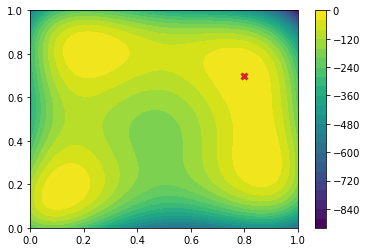

In [15]:
# Define and visualize the function
def f_hb(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 10 * x - 5
    y = 10 * y - 5
    return -(x**2+y-11)**2-(x+y**2-7)**2

# plot function f_rs
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_hb(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_hb((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [16]:
ves_hb, ei_hb, mes_hb = run_2d_experiment(f_hb,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_hb, ei_hb, mes_hb = np.log(max_Y - ves_hb), np.log(max_Y - ei_hb), np.log(max_Y - mes_hb)
ves_hb_mean, ei_hb_mean, mes_hb_mean = ves_hb.mean(axis=0), ei_hb.mean(axis=0), mes_hb.mean(axis=0)
ves_hb_std, ei_hb_std, mes_hb_std = ves_hb.std(axis=0), ei_hb.std(axis=0), mes_hb.std(axis=0)

100%|██████████| 10/10 [24:07<00:00, 144.79s/it]
<ipython-input-16-923f6fa04f13>:9: RuntimeWarning: divide by zero encountered in log
  ves_hb, ei_hb, mes_hb = np.log(max_Y - ves_hb), np.log(max_Y - ei_hb), np.log(max_Y - mes_hb)


## Case 8: Schaffer Function N. 2
Reference: https://www.sfu.ca/~ssurjano/schaffer2.html
$$f(x_1, x_2) = - 0.5 - \frac{\sin^2(x_1^2-x_2^2)-0.5}{[1+0.001(x_1^2+x_2^2)]^2},$$
where $x_1\in[-100,100], x_2\in[-100,100]$ get re-scaled.

Maximizer is  tensor([0.5000, 0.5000]) with value  0.5


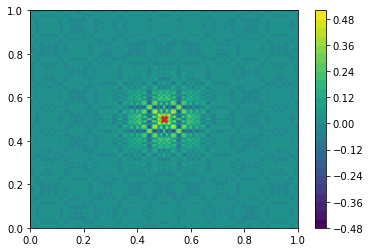

In [17]:
# Define and visualize the function
def f_sf(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 200 * x - 100
    y = 200 * y - 100
    return -(torch.sin(x**2-y**2)**2-1/2)/(1+0.001*(x**2+y**2))**2

# plot function f_rs
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_sf(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_sf((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [18]:
ves_sf, ei_sf, mes_sf = run_2d_experiment(f_sf,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_sf, ei_sf, mes_sf = np.log(max_Y - ves_sf), np.log(max_Y - ei_sf), np.log(max_Y - mes_sf)
ves_sf_mean, ei_sf_mean, mes_sf_mean = ves_sf.mean(axis=0), ei_sf.mean(axis=0), mes_sf.mean(axis=0)
ves_sf_std, ei_sf_std, mes_sf_std = ves_sf.std(axis=0), ei_sf.std(axis=0), mes_sf.std(axis=0)

100%|██████████| 10/10 [21:12<00:00, 127.21s/it]


## Case 9: Styblinski-Tang Function
Reference: https://www.sfu.ca/~ssurjano/stybtang.html
$$f(x_1,x_2) = -\frac{1}{2}\sum_{i=1}^2 (x_i^4-16x_i^2+5x_i),$$
where $x_1\in[-5,5], x_2\in[-5,5]$ get re-scaled.

Maximizer is  tensor([0.2100, 0.2100]) with value  78.33190155029297


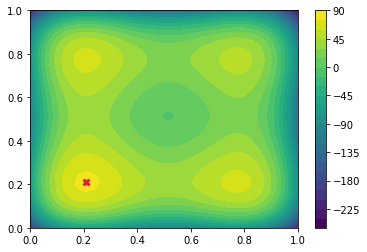

In [19]:
# Define and visualize the function
def f_st(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 10 * x - 5
    y = 10 * y - 5
    return -0.5*(x**4-16*x**2+5*x+y**4-16*y**2+5*y)

# plot function f_rs
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_st(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_st((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [20]:
ves_st, ei_st, mes_st = run_2d_experiment(f_st,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_st, ei_st, mes_st = np.log(max_Y - ves_st), np.log(max_Y - ei_st), np.log(max_Y - mes_st)
ves_st_mean, ei_st_mean, mes_st_mean = ves_st.mean(axis=0), ei_st.mean(axis=0), mes_st.mean(axis=0)
ves_st_std, ei_st_std, mes_st_std = ves_st.std(axis=0), ei_st.std(axis=0), mes_st.std(axis=0)

100%|██████████| 10/10 [1:25:29<00:00, 512.90s/it]


## Final Results

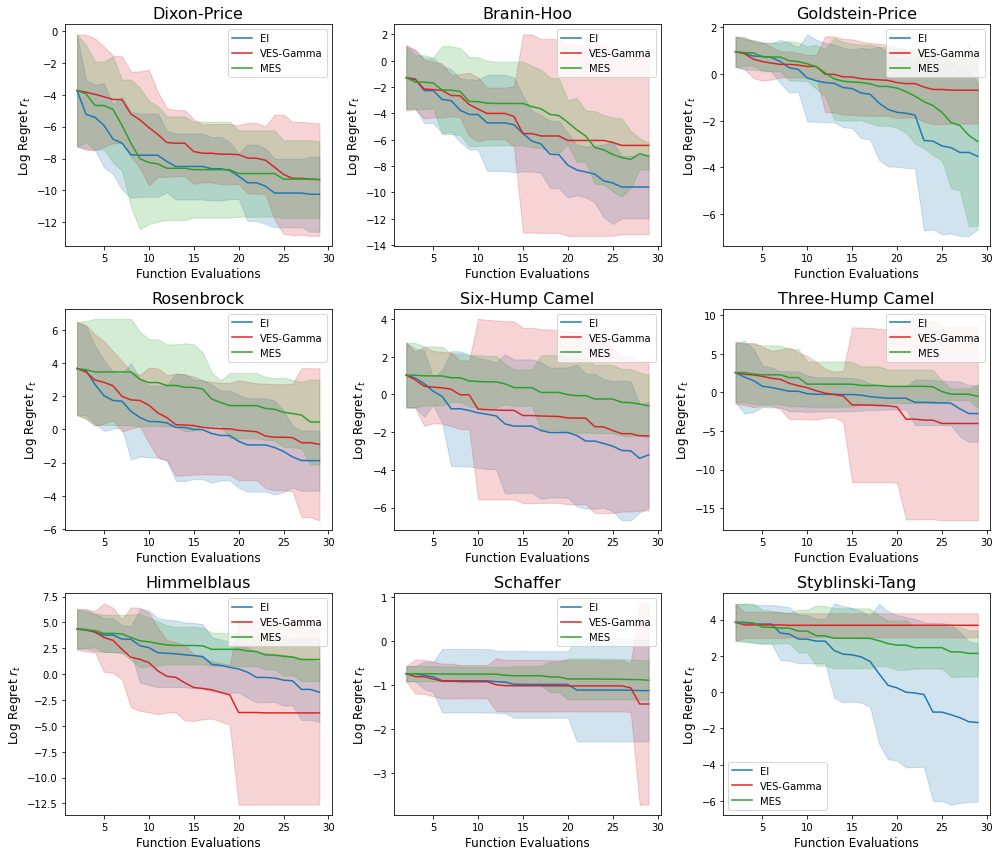

In [53]:
fig, axs = plt.subplots(3, 3, figsize=(14, 12))  # Create a 1x4 grid of subplots
names = ['Dixon-Price', 'Branin-Hoo', 'Goldstein-Price',
         'Rosenbrock', 'Six-Hump Camel', 'Three-Hump Camel',
         'Himmelblaus', 'Schaffer', 'Styblinski-Tang']
std_cont = 1.96
data = [(ei_dp_mean, ei_dp_std, ves_dp_mean, ves_dp_std, mes_dp_mean, mes_dp_std),
        (ei_bh_mean, ei_bh_std, ves_bh_mean, ves_bh_std, mes_bh_mean, mes_bh_std),
        (ei_gp_mean, ei_gp_std, ves_gp_mean, ves_gp_std, mes_gp_mean, mes_gp_std),
        (ei_rs_mean, ei_rs_std, ves_rs_mean, ves_rs_std, mes_rs_mean, mes_rs_std),
        (ei_sh_mean, ei_sh_std, ves_sh_mean, ves_sh_std, mes_sh_mean, mes_sh_std),
        (ei_thc_mean, ei_thc_std, ves_thc_mean, ves_thc_std, mes_thc_mean, mes_thc_std),
        (ei_hb_mean, ei_hb_std, ves_hb_mean, ves_hb_std, mes_hb_mean, mes_hb_std),
        (ei_sf_mean, ei_sf_std, ves_sf_mean, ves_sf_std, mes_sf_mean, mes_sf_std),
        (ei_st_mean, ei_st_std, ves_st_mean, ves_st_std, mes_st_mean, mes_st_std)]
for l in range(9):
    i, j = l // 3, l % 3
    ei_mean, ei_std, ves_mean, ves_std, mes_mean, mes_std = data[l]
    axs[i, j].plot(np.arange(len(ves_mean))+NUM_INIT, ei_mean, label='EI', c='tab:blue')
    axs[i, j].fill_between(np.arange(len(ei_mean))+NUM_INIT, ei_mean-std_cont*ei_std, ei_mean+std_cont*ei_std, color='tab:blue', alpha=0.2)
    axs[i, j].plot(np.arange(len(ves_mean))+NUM_INIT, ves_mean, label='VES-Gamma', c='tab:red')
    axs[i, j].fill_between(np.arange(len(ves_mean))+NUM_INIT, ves_mean-std_cont*ves_std, ves_mean+std_cont*ves_std, color='tab:red', alpha=0.2)
    axs[i, j].plot(np.arange(len(mes_mean))+NUM_INIT, mes_mean, label='MES', c='tab:green')
    axs[i, j].fill_between(np.arange(len(mes_mean))+NUM_INIT, mes_mean-std_cont*mes_std, mes_mean+std_cont*mes_std, color='tab:green', alpha=0.2)
    axs[i, j].legend()
    axs[i, j].set_xlabel('Function Evaluations', fontsize=12)
    axs[i, j].set_ylabel(r'Log Regret $r_t$', fontsize=12)
    axs[i, j].set_title(names[l], fontsize=16)
plt.tight_layout()  # Adjust the layout
# fig.savefig('ves_2d_3.pdf', dpi=300)

# Case 10: Levy Function
Reference: https://www.sfu.ca/~ssurjano/levy.html
$$f(x_1, x_2)=\sin^2(\pi w_1)+(w_1-1)^2[1+10\sin^2(\pi w_1+1)]+(w_2-1)^2[1+\sin^2(2\pi w_2)],$$
where $w_i=1 + (x_i-1)/4, x_i\in[-10, 10]$ and get re-scaled.

Maximizer is  tensor([0.5500, 0.5500]) with value  -7.64274186065882e-15


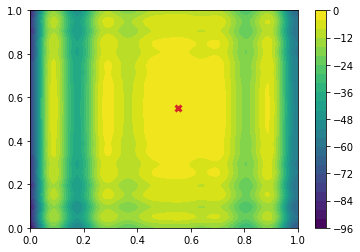

In [71]:
# Define and visualize the function
def f_lv(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 1 + (20*x-11)/4
    y = 1 + (20*y-11)/4
    return -torch.sin(torch.pi*x)**2 - (x-1)**2*(1+10*torch.sin(torch.pi*x+1)**2) - (y-1)**2*(1+torch.sin(2*torch.pi*y)**2)

# plot function f_rs
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_lv(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_lv((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [72]:
ves_lv, ei_lv, mes_lv = run_2d_experiment(f_lv,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_lv, ei_lv, mes_lv = np.log(max_Y - ves_lv), np.log(max_Y - ei_lv), np.log(max_Y - mes_lv)
ves_lv_mean, ei_lv_mean, mes_lv_mean = ves_lv.mean(axis=0), ei_lv.mean(axis=0), mes_lv.mean(axis=0)
ves_lv_std, ei_lv_std, mes_lv_std = ves_lv.std(axis=0), ei_lv.std(axis=0), mes_lv.std(axis=0)

100%|██████████| 10/10 [25:09<00:00, 150.92s/it]
<ipython-input-72-291689530f2b>:9: RuntimeWarning: divide by zero encountered in log
  ves_lv, ei_lv, mes_lv = np.log(max_Y - ves_lv), np.log(max_Y - ei_lv), np.log(max_Y - mes_lv)


# Case 11: Cross-in-tray Function
Reference: https://www.sfu.ca/~ssurjano/crossit.html
$$f(x_1, x_2) = 0.001\left(\lvert\sin(x_1)\sin(x_2)\exp\left(\lvert 100 - \frac{\sqrt{x_1^2+x_2^2}}{\pi}\rvert\right)\rvert+1\right)^{0.1},$$
where $x_i\in[-2,2]$ and get re-scaled.

Maximizer is  tensor([0.1600, 0.1600]) with value  1.1705769300460815


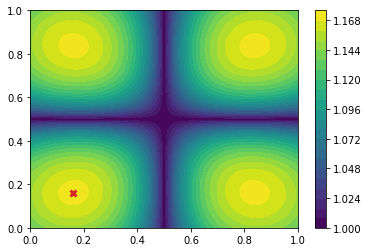

In [73]:
# Define and visualize the function
def f_cit(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 4 * x - 2
    y = 4 * y - 2
    return (torch.abs(torch.sin(x)*torch.sin(y)*torch.exp(torch.abs(2-torch.sqrt(x**2+y**2)/torch.pi)))+1)**0.1

# plot function f_rs
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_cit(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_cit((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [74]:
ves_cit, ei_cit, mes_cit = run_2d_experiment(f_cit,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_cit, ei_cit, mes_cit = np.log(max_Y - ves_cit), np.log(max_Y - ei_cit), np.log(max_Y - mes_cit)
ves_cit_mean, ei_cit_mean, mes_cit_mean = ves_cit.mean(axis=0), ei_cit.mean(axis=0), mes_cit.mean(axis=0)
ves_cit_std, ei_cit_std, mes_cit_std = ves_cit.std(axis=0), ei_cit.std(axis=0), mes_cit.std(axis=0)

100%|██████████| 10/10 [31:43<00:00, 190.33s/it]
<ipython-input-74-727b30075c71>:9: RuntimeWarning: divide by zero encountered in log
  ves_cit, ei_cit, mes_cit = np.log(max_Y - ves_cit), np.log(max_Y - ei_cit), np.log(max_Y - mes_cit)
<ipython-input-74-727b30075c71>:9: RuntimeWarning: invalid value encountered in log
  ves_cit, ei_cit, mes_cit = np.log(max_Y - ves_cit), np.log(max_Y - ei_cit), np.log(max_Y - mes_cit)


## Case 12: Eggholder Function
Reference: https://www.sfu.ca/~ssurjano/egg.html
$$f(x_1, x_2) = (x_2+47)\sin\left(\sqrt{\lvert x_2+\frac{x_1}{2}+47\rvert}\right)+x_1\sin\left(\sqrt{\lvert x_1-x_2-47\rvert}\right),$$
where $x_i\in[-512,512]$ and get re-scaled.

Maximizer is  tensor([1.0000, 0.8900]) with value  933.3248291015625


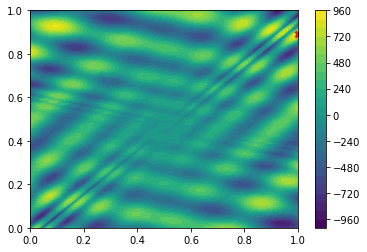

In [75]:
# Define and visualize the function
def f_eh(X):
    if isinstance(X, tuple):
        x,y = X
    elif X.ndim != 2:
        x,y = X[0],X[1]
    else:
        x,y = X[:,0],X[:,1]
    x = 1024 * x - 512
    y = 1024 * y - 512
    return (y+47)*torch.sin(torch.sqrt(torch.abs(y+x/2+(y+47))))+x*torch.sin(torch.sqrt(torch.abs(x-(y+47))))

# plot function f_rs
X1,X2 = torch.linspace(BOUNDS[0,0], BOUNDS[0,1], nx),torch.linspace(BOUNDS[1,0], BOUNDS[1,1], ny)
Xx,Xy = torch.meshgrid(X1, X2)
X = torch.vstack((Xx.flatten(), Xy.flatten())).T
Y = f_eh(X)
max_id = torch.argmax(Y)
max_Y = torch.max(Y)
plt.plot(X[max_id, 0], X[max_id, 1], 'kx', mew=3, c='tab:red')
plt.contourf(Xx, Xy, f_eh((Xx,Xy)),25)
plt.colorbar()
print('Maximizer is ',X[max_id], 'with value ', max_Y.item())

In [76]:
ves_eh, ei_eh, mes_eh = run_2d_experiment(f_eh,
                                  bounds=BOUNDS,
                                  num_init=NUM_INIT,
                                  num_trials=NUM_TRIALS,
                                  num_iter=NUM_ITER,
                                  num_paths=NUM_PATHS,
                                  nx=nx,
                                  ny=ny)
ves_eh, ei_eh, mes_eh = np.log(max_Y - ves_eh), np.log(max_Y - ei_eh), np.log(max_Y - mes_eh)
ves_eh_mean, ei_eh_mean, mes_eh_mean = ves_eh.mean(axis=0), ei_eh.mean(axis=0), mes_eh.mean(axis=0)
ves_eh_std, ei_eh_std, mes_eh_std = ves_eh.std(axis=0), ei_eh.std(axis=0), mes_eh.std(axis=0)

100%|██████████| 10/10 [1:25:34<00:00, 513.45s/it]


In [84]:
ves_lv[ves_lv == -np.inf] = -16
ves_cit[ves_cit == -np.inf] = -16
ei_cit[ei_cit == -np.inf] = -16
mes_cit[mes_cit == -np.inf] = -16
ves_lv_mean, ves_lv_std = ves_lv.mean(axis=0), ves_lv.std(axis=0)
ves_cit_mean, ves_cit_std = ves_cit.mean(axis=0), ves_cit.std(axis=0)
ei_cit_mean, ei_cit_std = np.nanmean(ei_cit.detach().numpy(), axis=0), np.nanstd(ei_cit.detach().numpy(), axis=0)
mes_cit_mean, mes_cit_std = np.nanmean(mes_cit.detach().numpy(), axis=0), np.nanstd(mes_cit.detach().numpy(), axis=0)

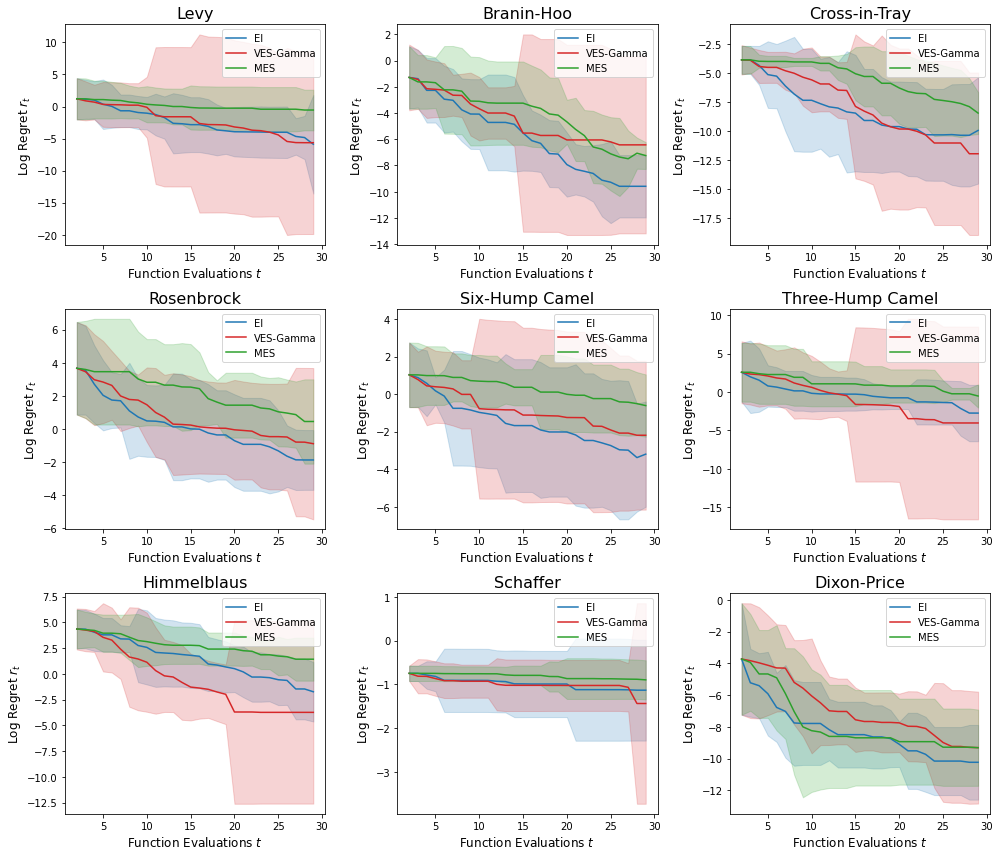

In [88]:
fig, axs = plt.subplots(3, 3, figsize=(14, 12))  # Create a 1x4 grid of subplots
names = ['Levy', 'Branin-Hoo', 'Cross-in-Tray',
         'Rosenbrock', 'Six-Hump Camel', 'Three-Hump Camel',
         'Himmelblaus', 'Schaffer', 'Dixon-Price']
std_cont = 1.96
data = [(ei_lv_mean, ei_lv_std, ves_lv_mean, ves_lv_std, mes_lv_mean, mes_lv_std),
        (ei_bh_mean, ei_bh_std, ves_bh_mean, ves_bh_std, mes_bh_mean, mes_bh_std),
        (ei_cit_mean, ei_cit_std, ves_cit_mean, ves_cit_std, mes_cit_mean, mes_cit_std),
        (ei_rs_mean, ei_rs_std, ves_rs_mean, ves_rs_std, mes_rs_mean, mes_rs_std),
        (ei_sh_mean, ei_sh_std, ves_sh_mean, ves_sh_std, mes_sh_mean, mes_sh_std),
        (ei_thc_mean, ei_thc_std, ves_thc_mean, ves_thc_std, mes_thc_mean, mes_thc_std),
        (ei_hb_mean, ei_hb_std, ves_hb_mean, ves_hb_std, mes_hb_mean, mes_hb_std),
        (ei_sf_mean, ei_sf_std, ves_sf_mean, ves_sf_std, mes_sf_mean, mes_sf_std),
        (ei_dp_mean, ei_dp_std, ves_dp_mean, ves_dp_std, mes_dp_mean, mes_dp_std)]
for l in range(9):
    i, j = l // 3, l % 3
    ei_mean, ei_std, ves_mean, ves_std, mes_mean, mes_std = data[l]
    axs[i, j].plot(np.arange(len(ves_mean))+NUM_INIT, ei_mean, label='EI', c='tab:blue')
    axs[i, j].fill_between(np.arange(len(ei_mean))+NUM_INIT, ei_mean-std_cont*ei_std, ei_mean+std_cont*ei_std, color='tab:blue', alpha=0.2)
    axs[i, j].plot(np.arange(len(ves_mean))+NUM_INIT, ves_mean, label='VES-Gamma', c='tab:red')
    axs[i, j].fill_between(np.arange(len(ves_mean))+NUM_INIT, ves_mean-std_cont*ves_std, ves_mean+std_cont*ves_std, color='tab:red', alpha=0.2)
    axs[i, j].plot(np.arange(len(mes_mean))+NUM_INIT, mes_mean, label='MES', c='tab:green')
    axs[i, j].fill_between(np.arange(len(mes_mean))+NUM_INIT, mes_mean-std_cont*mes_std, mes_mean+std_cont*mes_std, color='tab:green', alpha=0.2)
    axs[i, j].legend()
    axs[i, j].set_xlabel(r'Function Evaluations $t$', fontsize=12)
    axs[i, j].set_ylabel(r'Log Regret $r_t$', fontsize=12)
    axs[i, j].set_title(names[l], fontsize=16)
plt.tight_layout()  # Adjust the layout
# fig.savefig('ves_2d_4.pdf', dpi=300)